In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
df = pd.read_csv("C:/Users/dell/OneDrive - Universidad de Guayaquil/Analista de datos - Linkedin Learning/base_datos_2008.csv")

In [2]:
df1=df.head(500000)

In [3]:
df2=df[df.Origin.isin(["ATL","HOU","IND"])]

In [4]:
df2.groupby(by=df.Origin)["Origin"].count()

Origin
ATL    414513
HOU     55933
IND     42750
Name: Origin, dtype: int64

In [5]:
df1.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
#preprocesamiento de datos 
#creamos una lista vacia vamos iterando y actualizando la lista de index
times=[]
for i in np.arange(len(df1)):
    times.append(datetime.datetime(year=2008,month=df1.loc[i,"Month"],day=df1.loc[i,"DayofMonth"]))


In [7]:
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [8]:
df1["Time"] = times

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data=df1.groupby(by=df1.Time,as_index=False)["DepDelay","ArrDelay"].mean()

In [13]:
data.head()

,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


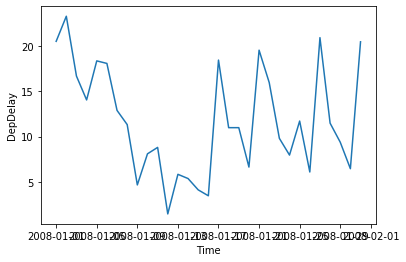

In [14]:
sns.lineplot(data.Time,data.DepDelay)


In [15]:
data=df1.groupby(by=df1.Time)["DepDelay","ArrDelay"].mean()
data.head()

,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


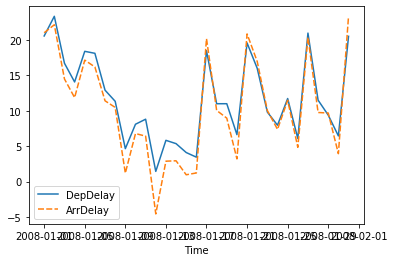

In [16]:
sns.lineplot(data=data)

In [21]:
#preprocesamiento de datos 
#creamos una lista vacia vamos iterando y actualizando la lista de index
times=[]
for i in df2.index:
    times.append(datetime.datetime(year=2008,month=df2.loc[i,"Month"],day=df2.loc[i,"DayofMonth"]))


In [22]:
df2["Time"]=times

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


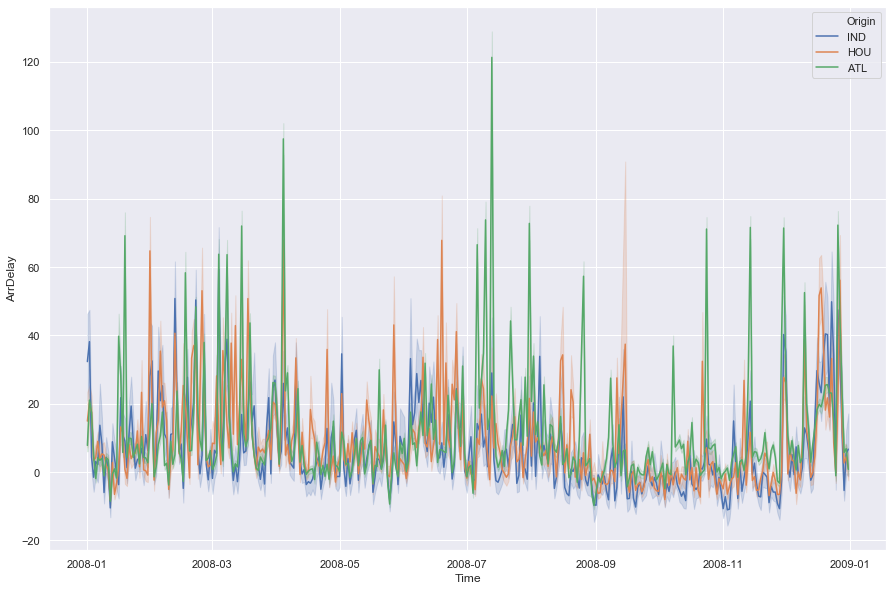

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time",y="ArrDelay",hue="Origin",data=df2)